# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime as dt

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather))
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = dt.fromtimestamp(city_weather["dt"], tz = None)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as error:
        print("City not found. Skipping...")
        print(error)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barcelos
{"coord": {"lon": -8.6151, "lat": 41.5388}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01n"}], "base": "stations", "main": {"temp": 290.34, "feels_like": 290.2, "temp_min": 290.23, "temp_max": 291.31, "pressure": 1018, "humidity": 80, "sea_level": 1018, "grnd_level": 1014}, "visibility": 10000, "wind": {"speed": 3.35, "deg": 349, "gust": 5.06}, "clouds": {"all": 0}, "dt": 1690320498, "sys": {"type": 1, "id": 6900, "country": "PT", "sunrise": 1690262508, "sunset": 1690315191}, "timezone": 3600, "id": 2742416, "name": "Barcelos", "cod": 200}
Processing Record 2 of Set 1 | hermanus
{"coord": {"lon": 19.2345, "lat": -34.4187}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01n"}], "base": "stations", "main": {"temp": 280.82, "feels_like": 279.31, "temp_min": 280.82, "temp_max": 280.82, "pressure": 1018, "humidity": 68, "sea_le

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          528
Lat           528
Lng           528
Max Temp      528
Humidity      528
Cloudiness    528
Wind Speed    528
Country       528
Date          528
dtype: int64

In [25]:
#Clean up column appearance for readability
city_data_df["City"] = city_data_df["City"].str.title()
city_data_df["Max Temp"] = city_data_df["Max Temp"]-273.15
city_data_df = city_data_df.rename(columns = {
                    "City":"City",
                    "Lat":"Latitude",
                    "Lng":"Longitude",
                    "Max Temp": "Max Temp (C)",
                    "Humidity":"Humidity (g per kg)",
                    "Cloudiness": "Cloudiness (%)",
                    "Wind Speed": "Wind Speed (m per s)",
                    "Country":"Country",
                    "Date":"Date"})

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp (C),Humidity (g per kg),Cloudiness (%),Wind Speed (m per s),Country,Date
0,Barcelos,41.5388,-8.6151,18.16,80,0,3.35,PT,2023-07-25 17:28:18
1,Hermanus,-34.4187,19.2345,7.67,68,0,2.38,ZA,2023-07-25 17:24:13
2,Adamstown,-25.0660,-130.1015,22.54,91,100,17.51,PN,2023-07-25 17:28:19
3,Tamanrasset,22.7850,5.5228,30.95,11,0,2.06,DZ,2023-07-25 17:28:19
4,Dudinka,69.4058,86.1778,14.79,62,0,4.96,RU,2023-07-25 17:28:19


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp (C),Humidity (g per kg),Cloudiness (%),Wind Speed (m per s),Country,Date
City_ID,,,,,,,,,
0,Barcelos,41.5388,-8.6151,18.16,80,0,3.35,PT,2023-07-25 17:28:18
1,Hermanus,-34.4187,19.2345,7.67,68,0,2.38,ZA,2023-07-25 17:24:13
2,Adamstown,-25.0660,-130.1015,22.54,91,100,17.51,PN,2023-07-25 17:28:19
3,Tamanrasset,22.7850,5.5228,30.95,11,0,2.06,DZ,2023-07-25 17:28:19
4,Dudinka,69.4058,86.1778,14.79,62,0,4.96,RU,2023-07-25 17:28:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

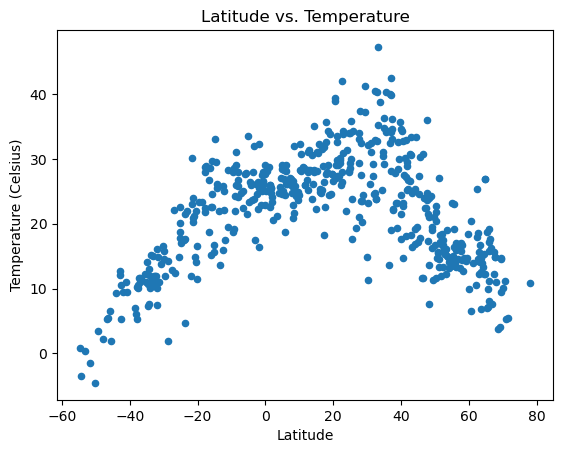

In [28]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind = "scatter", x = "Latitude", y = "Max Temp (C)")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

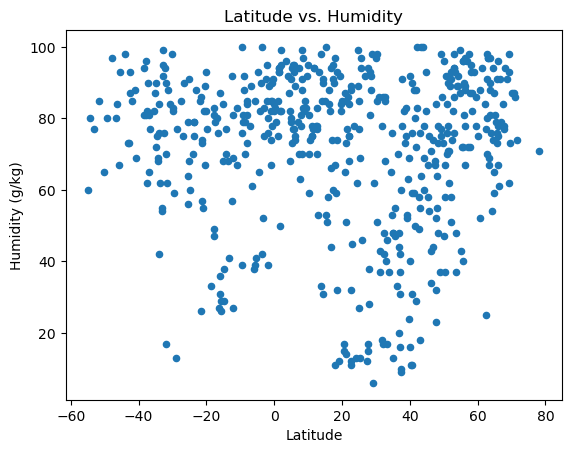

In [29]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind = "scatter", x = "Latitude", y = "Humidity (g per kg)")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (g/kg)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

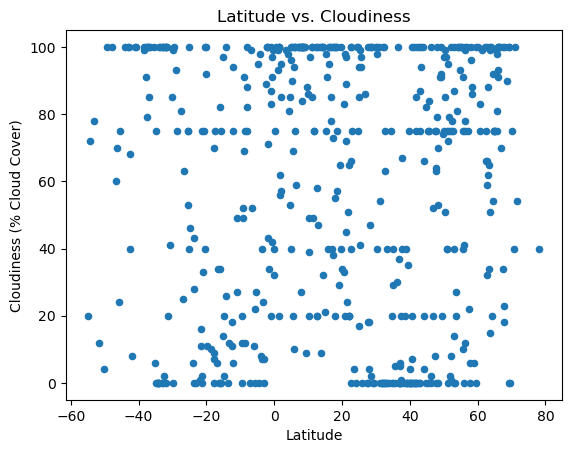

In [30]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness (%)")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (% Cloud Cover)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

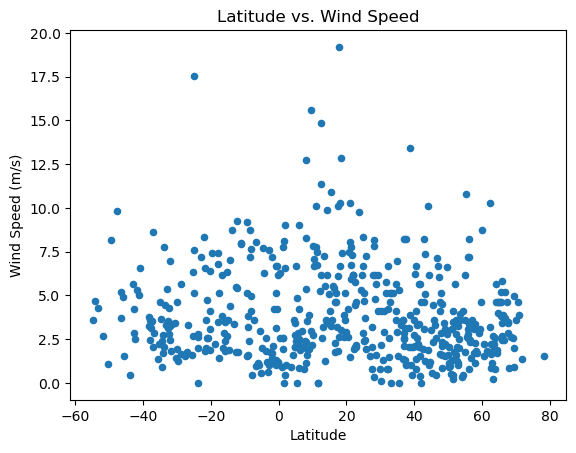

In [31]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind = "scatter", x = "Latitude", y = "Wind Speed (m per s)")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (C),Humidity (g per kg),Cloudiness (%),Wind Speed (m per s),Country,Date
City_ID,,,,,,,,,
0,Barcelos,41.5388,-8.6151,18.16,80,0,3.35,PT,2023-07-25 17:28:18
3,Tamanrasset,22.7850,5.5228,30.95,11,0,2.06,DZ,2023-07-25 17:28:19
4,Dudinka,69.4058,86.1778,14.79,62,0,4.96,RU,2023-07-25 17:28:19
5,Nemuro,43.3236,145.5750,16.41,100,94,1.26,JP,2023-07-25 17:28:20
8,Yellowknife,62.4560,-114.3525,25.31,25,75,10.28,CA,2023-07-25 17:28:21


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"]<0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (C),Humidity (g per kg),Cloudiness (%),Wind Speed (m per s),Country,Date
City_ID,,,,,,,,,
1,Hermanus,-34.4187,19.2345,7.67,68,0,2.38,ZA,2023-07-25 17:24:13
2,Adamstown,-25.0660,-130.1015,22.54,91,100,17.51,PN,2023-07-25 17:28:19
6,Margaret River,-33.9500,115.0667,11.94,84,100,7.76,AU,2023-07-25 17:24:15
7,Port-Aux-Francais,-49.3500,70.2167,3.43,80,100,8.18,TF,2023-07-25 17:28:20
9,Puerto Ayora,-0.7393,-90.3518,26.42,90,42,3.13,EC,2023-07-25 17:24:13


In [34]:
# Define a function to create Linear Regression plots
def city_lat_regress(y_name, df, x, y, hemisphere):
    x_values = df["Latitude"]
    y_values = df[y_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"Latitude vs. {y_name}")
    plt.xlabel("Latitude")
    plt.ylabel(y_name)
    plt.text(x, y, line_eq, color = "r")
    plt.savefig(f"output_data/{hemisphere}{y_name}.png")
    print(f"The correlation coefficient bewteen Latitude and {y_name} in the {hemisphere} Hemisphere is: \n {rvalue}")
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient bewteen Latitude and Max Temp (C) in the Northern Hemisphere is: 
 -0.6188836129428222


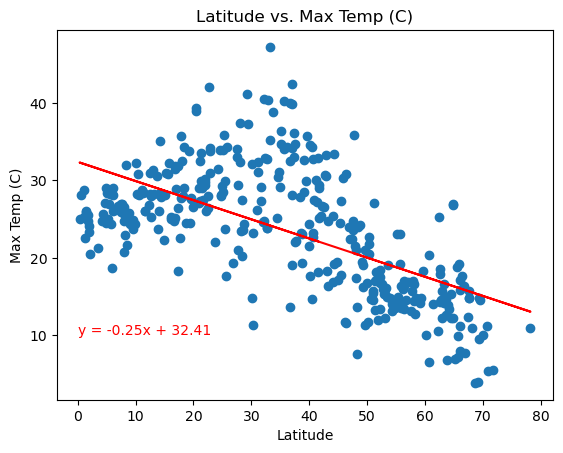

In [35]:
# Linear regression on Northern Hemisphere
city_lat_regress("Max Temp (C)", northern_hemi_df, 0, 10, "Northern")

The correlation coefficient bewteen Latitude and Max Temp (C) in the Southern Hemisphere is: 
 0.8604204904497825


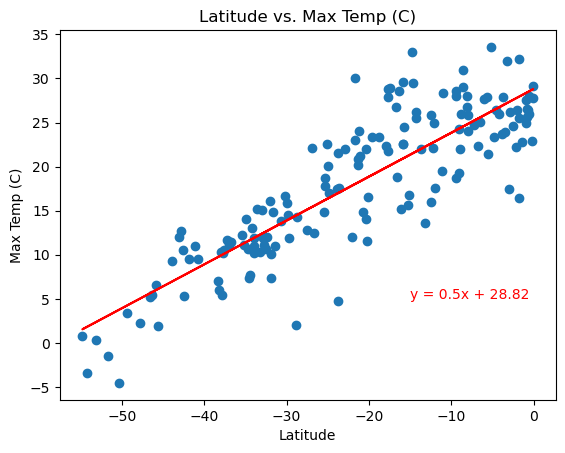

In [36]:
# Linear regression on Southern Hemisphere
city_lat_regress("Max Temp (C)", southern_hemi_df, -15, 5, "Southern")

**Discussion about the linear relationship:** 
- There is a medium to strong correlation between latitude and maximum temperature for both hemispheres, with this correlation being positive and the northern hemisphere and negative in the southern hemisphere. This is as expected: the farther a region is from the equator, the lower the maximum temperature is. 
- The correlation for the linear regression in the southern hemisphere is stronger, but I would posit that this could have two causes. One, which would be less interesting, is that this difference in strength is caused by the random nature of our sampling. On the other hand, we could be seeing differences between temperature behavior in the northern and southern hemispheres caused by the season. Currently, the northern hemisphere is experiencing summer, which should cause an increase in maximum temperatures overall and, combined with global warming, may lead to more extreme temperatures. This could be creating near-outliers in our data set, lessening the correlation in that hemisphere. On the other hand, the southern hemisphere is currently experiencing winter, so we would expect the more extreme temperatures with sporadic behavior to be the minimum temperatures for that area. 
-In accordance with the discussion of season in the previous point, we see a distinctly wider range of temperatures in our southern hemisphere data. This makes sense, as the tilting of Earth on its axis should lead to farther northern territories with temperatures closer to those at the Equator than are observed at other times of year, while the extremes of the southern hemisphere should be even colder than they are at other times of the year, and less like temperatures at the equator. 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient bewteen Latitude and Humidity (g per kg) in the Northern Hemisphere is: 
 0.014596254991969195


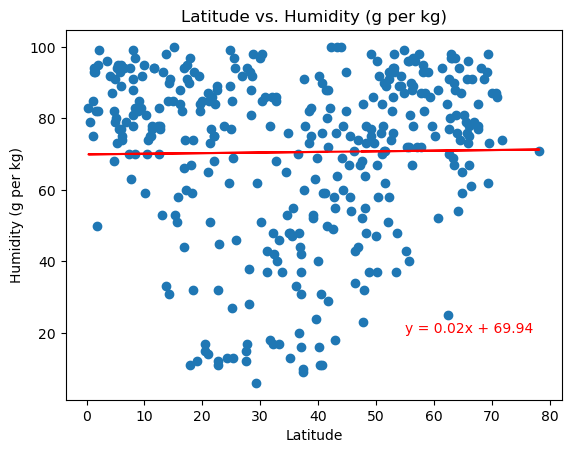

In [37]:
# Northern Hemisphere
city_lat_regress("Humidity (g per kg)", northern_hemi_df,55,20, "Northern")

The correlation coefficient bewteen Latitude and Humidity (g per kg) in the Southern Hemisphere is: 
 -0.10360890216930288


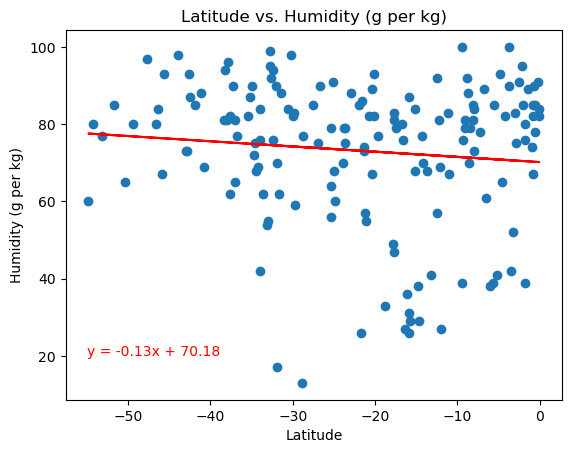

In [38]:
# Southern Hemisphere
city_lat_regress("Humidity (g per kg)", southern_hemi_df,-55,20, "Southern")

**Discussion about the linear relationship:** 
- The correlation coefficients for the relationship between humidity and latitude in each hemisphere are extremely small, indicating a distinct lack of correlation between the two variables. This correlation is small enough that discussing positive vs. negative does not seem enetirely relevant. Perhaps a better predictor of humidity would be proximity to large bodies of water. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient bewteen Latitude and Cloudiness (%) in the Northern Hemisphere is: 
 -0.09455278802479015


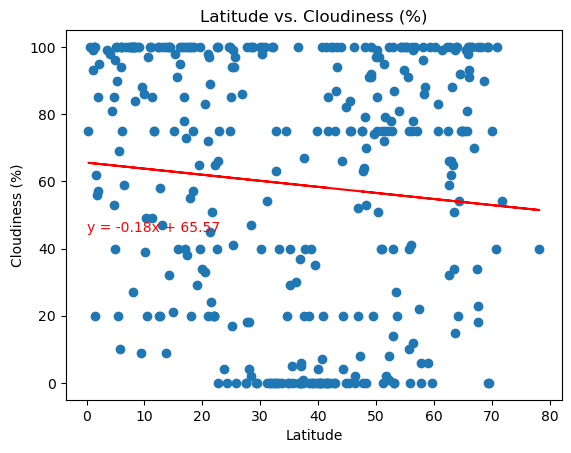

In [39]:
# Northern Hemisphere
city_lat_regress("Cloudiness (%)", northern_hemi_df,0,45, "Northern")

The correlation coefficient bewteen Latitude and Cloudiness (%) in the Southern Hemisphere is: 
 -0.1421630902556725


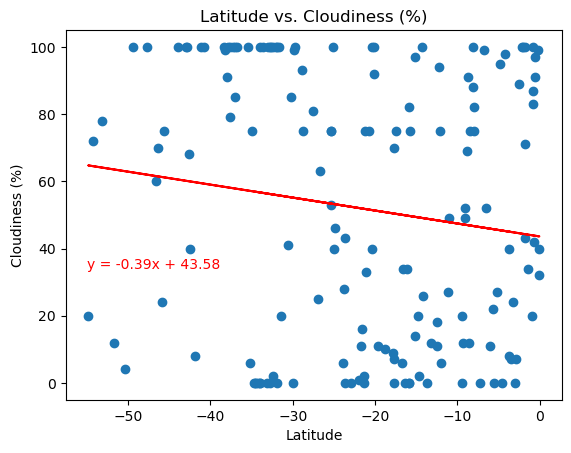

In [40]:
# Southern Hemisphere
city_lat_regress("Cloudiness (%)", southern_hemi_df,-55,34, "Southern")

**Discussion about the linear relationship:** 
- As in the case of humidity, there is an extremely weak correlation between cloudiness and Latitude shown for both hemispheres. There are distinct horizontal lines through the data, especially in the northern hemisphere case, which may indicate that cloudiness is often rounded to nearest 5%s, or that cloud cover tends to be uniform over large regions. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient bewteen Latitude and Wind Speed (m per s) in the Northern Hemisphere is: 
 -0.22552683569942877


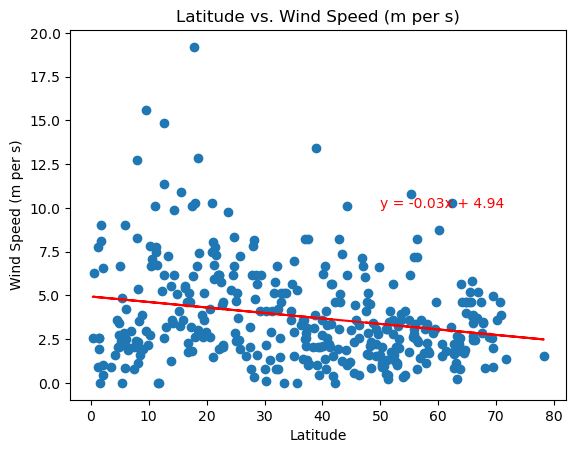

In [41]:
# Northern Hemisphere
city_lat_regress("Wind Speed (m per s)", northern_hemi_df,50,10, "Northern")

The correlation coefficient bewteen Latitude and Wind Speed (m per s) in the Southern Hemisphere is: 
 -0.017086125590666305


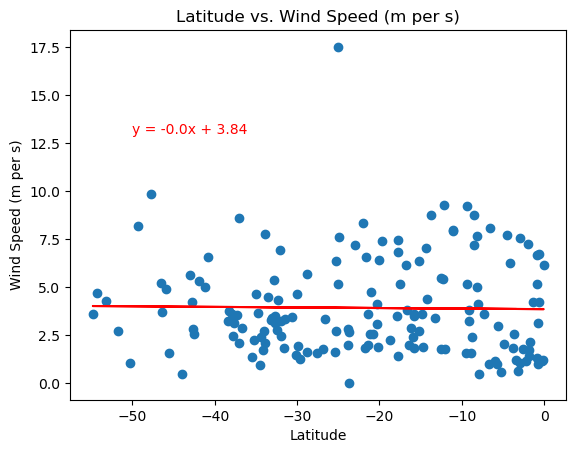

In [42]:
# Southern Hemisphere
city_lat_regress("Wind Speed (m per s)", southern_hemi_df,-50,13, "Southern")

**Discussion about the linear relationship:** 
- Once more, the correlations between Wind Speed and Latitude are extremely weak. These plots look the most randomly scattered of all, with no distinct patterns of any kind. We do experience an interesting major outlier in the Southern Hemisphere data, which should even be visible as an outlier from all of the data in the currently saved Fig4 if this graph changes when the code is rerun. 